<a href="https://colab.research.google.com/github/CamK2/ComputerVision/blob/main/Stereo_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I will show how to estimate the depth of objects using two images taken from cameras separated horizontally in space (just like a left and right eye).

Specifically, I will use opencv's [StereoBM class](https://docs.opencv.org/3.4/d9/dba/classcv_1_1StereoBM.html).

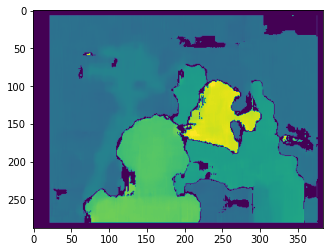

In [5]:
import cv2
import matplotlib.pyplot as plt
leftImg = cv2.imread('left.png',0)
rightImg = cv2.imread('right.png',0)
stereo_matcher_object = cv2.StereoBM.create(numDisparities=16,
                                            blockSize=15)
disp_map = stereo_matcher_object.compute(leftImg, rightImg)
plt.imshow(disp_map)
plt.show()